  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

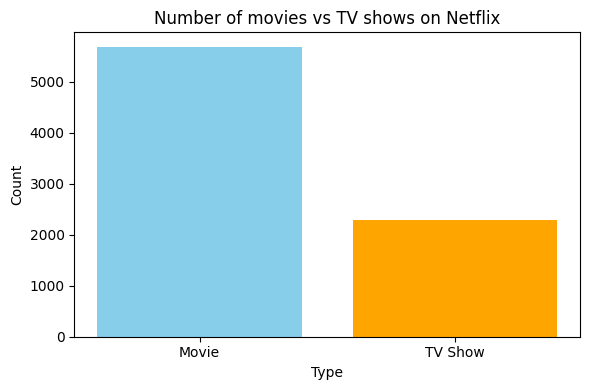

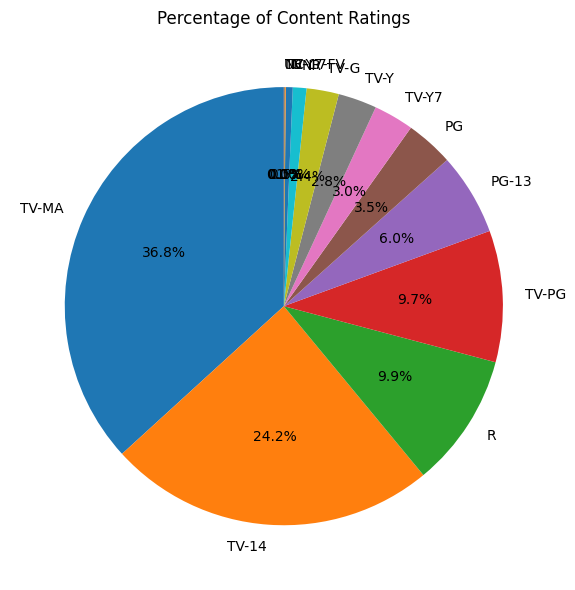

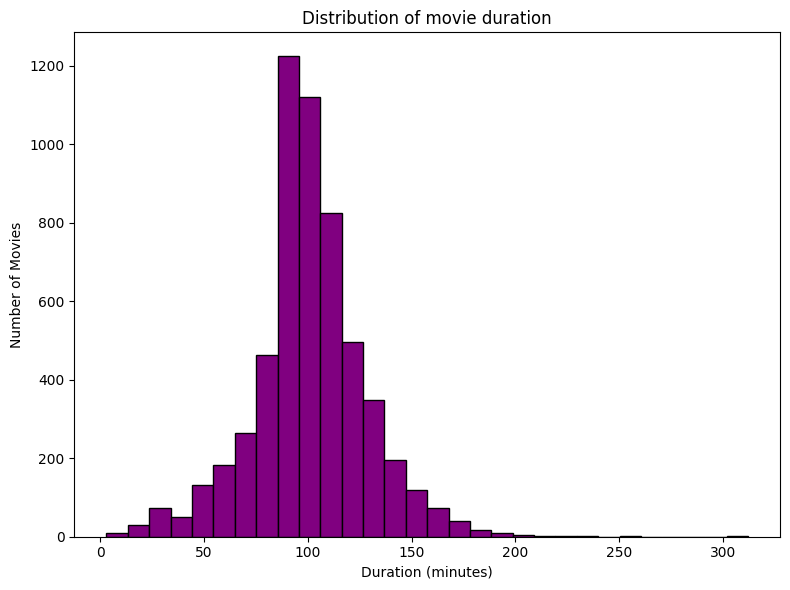

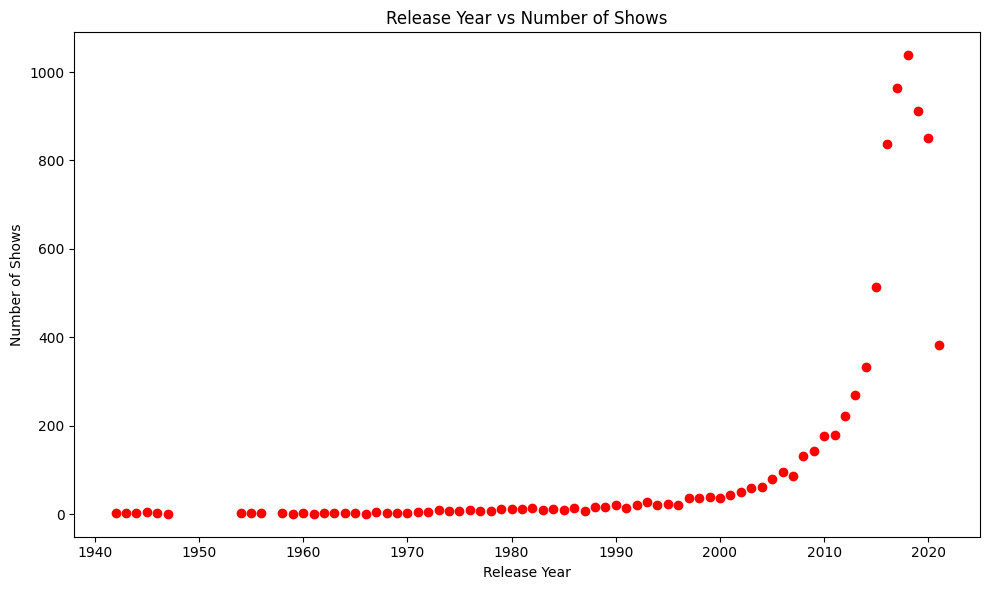

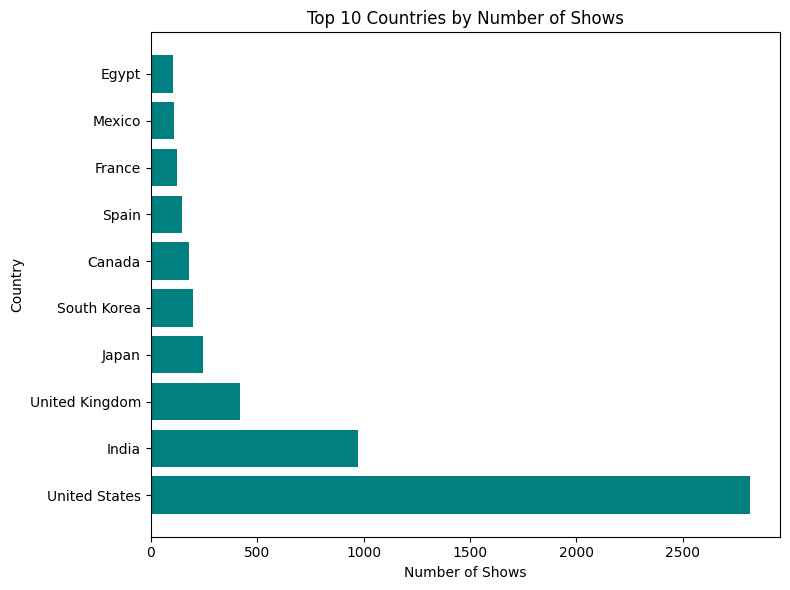

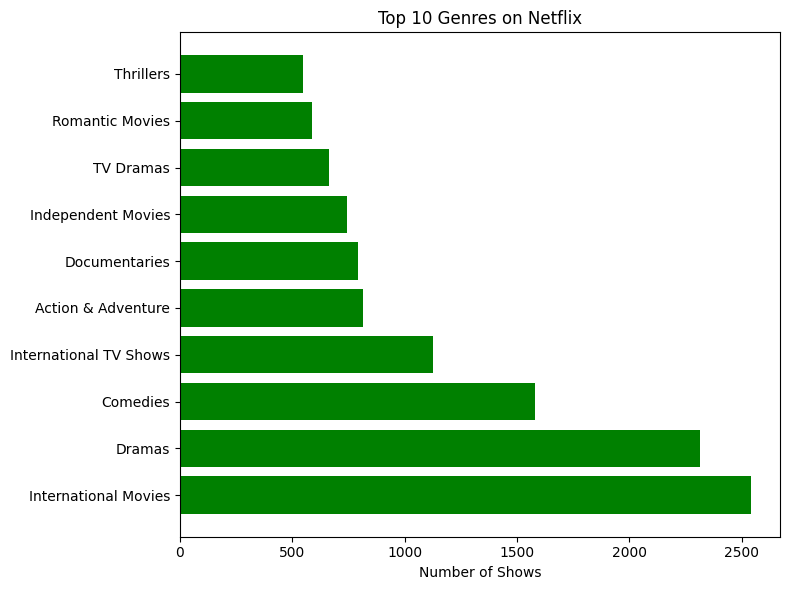

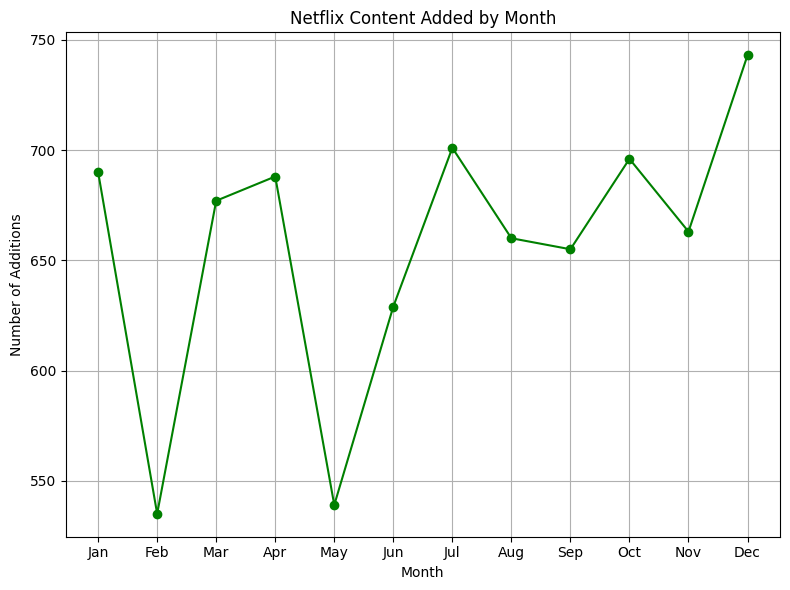

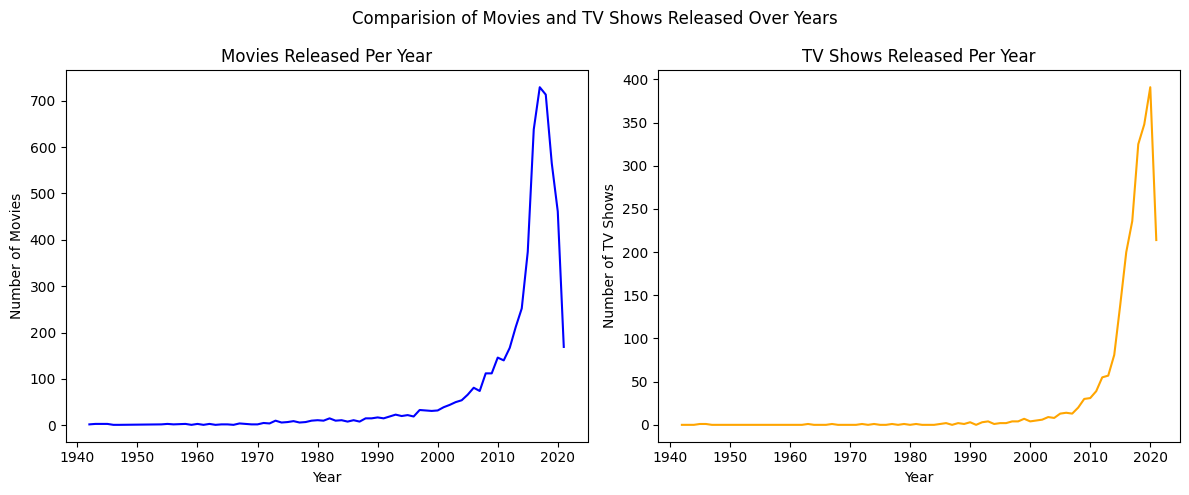

In [3]:
import pandas  as pd
import matplotlib.pyplot as plt

#loading data
df = pd.read_csv('netflix_titles.csv')
print(df.head())

#clean data
df = df.dropna(subset=['type', 'release_year', 'rating', 'country', 'duration'])

type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue','orange'])
plt.title('Number of movies vs TV shows on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('movies_vs_tvshows.png')
plt.show() 

rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels= rating_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Content Ratings')
plt.tight_layout()
plt.savefig('content_ratings_pie.png')
plt.show()

movie_df = df[df['type'] == 'Movie'].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min','').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins= 30, color= 'purple', edgecolor= 'black')
plt.title('Distribution of movie duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.savefig('movie_duration_histogram.png')
plt.show() 

release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='red')
plt.title('Release Year vs Number of Shows')
plt.xlabel('Release Year')
plt.ylabel('Number of Shows')
plt.tight_layout()
plt.savefig('release_year_scatter.png')
plt.show() 

country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values, color='teal')
plt.title('Top 10 Countries by Number of Shows')
plt.xlabel('Number of Shows')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig('top10_countries.png')
plt.show() 

genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in genres for genre in sublist]
genre_counts = pd.Series(flat_genres).value_counts().head(10)

plt.figure(figsize=(8,6))
plt.barh(genre_counts.index, genre_counts.values, color='green')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Shows')
plt.tight_layout()
plt.savefig('top_genres.png')
plt.show()

#Are there seasonal trends in Netflix releases (based on 'date_added')
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['month_added'] = df['date_added'].dt.month
monthly_additions = df['month_added'].value_counts().sort_index()

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.figure(figsize=(8,6))
plt.plot(months, monthly_additions, marker='o', linestyle='-', color='green')
plt.title("Netflix Content Added by Month")
plt.xlabel("Month")
plt.ylabel("Number of Additions")
plt.grid(True)
plt.tight_layout()
plt.show()

content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

fig, ax = plt.subplots(1,2, figsize=(12,5))

#first subplot: movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color= 'blue')
ax[0].set_title('Movies Released Per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

#second subplot: TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color= 'orange')
ax[1].set_title('TV Shows Released Per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

fig.suptitle('Comparision of Movies and TV Shows Released Over Years')

plt.tight_layout()
plt.savefig('movies_tv_shows_comparision.png')
plt.show()